In [1]:
# Installing library 'beautifultable', if not installed.
!pip install beautifultable

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from beautifultable import BeautifulTable

#Importing the utility_template file containing all functions reading files & returning the data structure.
import readmission_python_script as util

#Importing a library for reloading the imported packages as new instance with all their changes.
import importlib
importlib.reload(util)

<module 'capstone_group04' from '/Users/HarshitGaur/Documents/Northeastern University/MPS Analytics/ALY 6140/Capstone Project/Submissions/Final Submission/capstone_group04.py'>

In [2]:
# Reading Dataset from Open source URL.
dataSet = util.read_dataset('https://drive.google.com/file/d/17fb1vZ8tj1avIrii6bd4LKRF8uh3uO2r/view?usp=sharing')

In [3]:
# Dropping all rows which do not have HbA1C values
dataSet = dataSet[dataSet.A1Cresult != "None"]

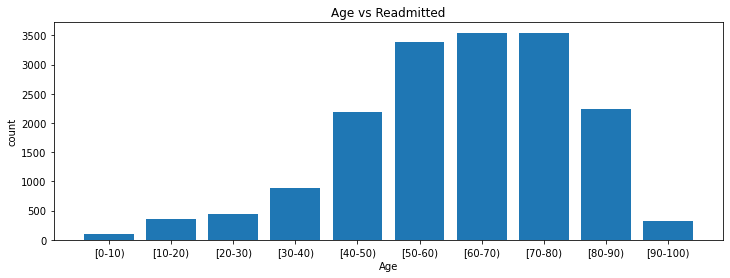

In [4]:
# Plot 1: 'Age vs Readmitted Count'
plot1 = util.plot_age_readmitted(dataSet)

<Figure size 720x576 with 0 Axes>

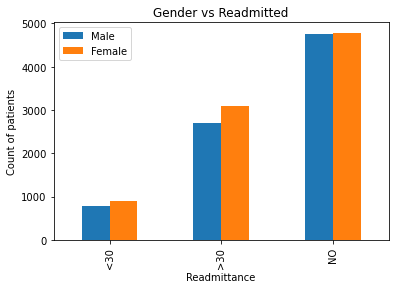

In [5]:
# Plot 2: 'Gender vs Readmitted Count'
plot2 = util.plot_gender_readmitted(dataSet)

<Figure size 720x576 with 0 Axes>

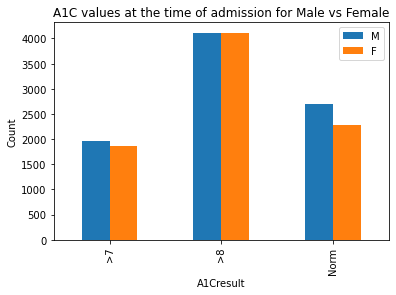

In [6]:
# Plot 3: 'Gender vs HbA1C Values'
plot3 = util.plot_gender_a1cresult(dataSet)

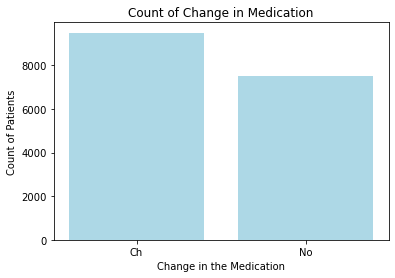

In [7]:
# Plot 4: 'Count of Patients vs Change in Medication'
plot4 = util.plot_medication_patients(dataSet)

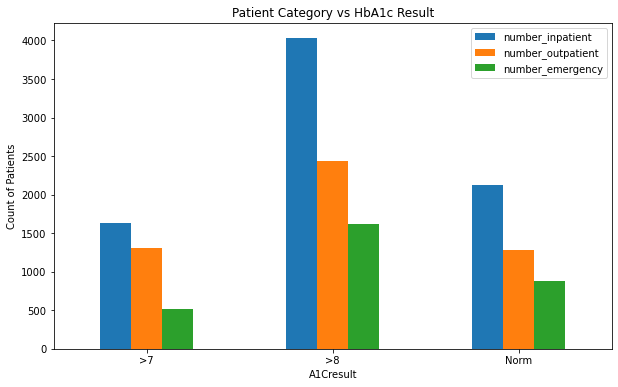

In [8]:
# Plot 5: 'Patient Category vs HbA1c Result'
plot5 = util.plot_hba1c_patients(dataSet)

In [9]:
# Dropping irrelevant features from the dataset as they are either identification-numbers (IDs)
dataSet = util.drop_irrelevant_columns(dataSet)

In [10]:
# Typecasting Diagnosis to ICD-9
dataSet = util.type_cast_diagnosis_to_icd9(dataSet)

In [11]:
# Labelling readmitted features as Binary (Yes, NO)
dataSet = util.label_target_column(dataSet)

<Figure size 432x288 with 0 Axes>

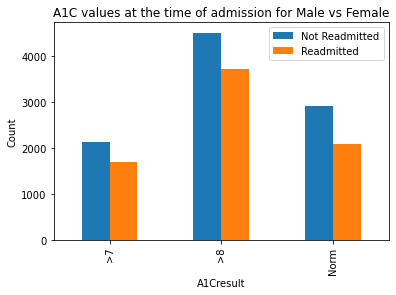

In [12]:
# Plot 6: 'Patient Category vs HbA1c Result'
plot6 = util.plot_admission_A1C_value(dataSet)

In [13]:
# One-Hot Encoding of Categorical Features
columnList = [
    'diag_1', 'age', 'gender', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
    'max_glu_serum', 'insulin', 'change', 'diabetesMed'
]

dataSet = util.one_hot_encoding(dataSet, columnList)

In [14]:
# print(dataSet.corr())
# sns.heatmap(dataSet.corr())

In [15]:
pd.set_option('display.max_columns', 500)
# display(dataSet.columns)
display(dataSet)

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,readmitted,diag_1_1.0,diag_1_2.0,diag_1_3.0,diag_1_4.0,diag_1_5.0,diag_1_6.0,diag_1_7.0,diag_1_8.0,diag_1_9.0,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),gender_Female,gender_Male,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
26,1,6,64,3,18,0,0,7,NO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
74,1,5,34,0,17,0,1,7,YES,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
98,1,2,53,0,6,0,0,3,NO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
103,1,1,59,0,12,0,0,7,NO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1
107,1,3,34,0,11,0,0,8,YES,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101749,3,3,27,1,29,1,0,9,NO,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
101751,3,13,77,6,65,0,0,16,NO,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
101754,1,9,50,2,33,0,0,9,YES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
101755,1,14,73,6,26,1,0,9,YES,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1


In [16]:
# Setting 'Target Value' for Training. Removing the feature from the data set.
dataSet, targetValues = util.set_target_value(dataSet)

In [17]:
targetValues.value_counts()

NO     9542
YES    7476
Name: readmitted, dtype: int64

In [18]:
# corrM = dataSet.corr()
# corrM
# plot for EDA

In [19]:
# plt.figure(figsize=(20, 10))
# sns.heatmap(corrM)

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(dataSet, targetValues, test_size=0.20) # 80% training and 20% test

In [21]:
# Random Forest Classifier
resultDict, error, clf = util.random_forest_classifier(X_train, X_test, y_train, y_test)

In [22]:
# Feature Selection
print(pd.Series(clf.feature_importances_*100, index=X_train.columns).sort_values(ascending=False).to_string())

num_lab_procedures       11.744876
num_medications          10.779697
time_in_hospital          8.068668
number_inpatient          5.838745
number_diagnoses          5.742926
num_procedures            5.160126
admission_type_id         4.186935
number_emergency          2.020126
diag_1_1.0                1.817025
A1Cresult_>8              1.728006
gender_Male               1.714214
gender_Female             1.698682
age_[50-60)               1.628236
A1Cresult_Norm            1.616986
age_[60-70)               1.611033
age_[70-80)               1.602510
diag_1_9.0                1.527061
A1Cresult_>7              1.479979
diag_1_2.0                1.406160
age_[80-90)               1.376068
diag_1_4.0                1.313585
age_[40-50)               1.291956
insulin_Steady            1.190146
insulin_No                1.029142
glipizide_No              0.994002
diag_1_3.0                0.982779
metformin_No              0.971269
glipizide_Steady          0.924079
metformin_Steady    

In [23]:
# Reintializing the dataset and performing feature engineering after feature importance calculated using Random Forest

# Reading Dataset from Open source URL.
dataSet = util.read_dataset('https://drive.google.com/file/d/17fb1vZ8tj1avIrii6bd4LKRF8uh3uO2r/view?usp=sharing')

# Dropping all rows which do not have HbA1C values
dataSet = dataSet[dataSet.A1Cresult != "None"]

# Dropping irrelevant features from the dataset as they are either identification-numbers (IDs)
dataSet = util.drop_irrelevant_columns(dataSet)

# Typecasting Diagnosis to ICD-9
dataSet = util.type_cast_diagnosis_to_icd9(dataSet)

# Labelling readmitted features as Binary (Yes, NO)
dataSet = util.label_target_column(dataSet)

In [24]:
# Dropping unimportant features (with Negligible Importance Factor from Random Forest Classifier - Importance Matrix)

#Removing columns using Random Forest Classifer
columnList = ['glyburide', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
              'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'max_glu_serum']

for i in columnList:
    dataSet = dataSet.drop(i,axis = 1)

In [25]:
# One-Hot Encoding of Categorical Features
columnList = [
    'diag_1', 'age', 'gender', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
    'max_glu_serum', 'insulin', 'change', 'diabetesMed'
]

dataSet = util.one_hot_encoding(dataSet, columnList)

# Setting 'Target Value' for Training. Removing the feature from the data set.
dataSet, targetValues = util.set_target_value(dataSet)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(dataSet, targetValues, test_size=0.20) # 80% training and 20% test

In [26]:
# Random Forest Classifier
resultDict, error, clf = util.random_forest_classifier(X_train, X_test, y_train, y_test)

In [27]:
# Printing all 'N-Estimator' values along with their accuracies.

table = BeautifulTable()
table.column_headers = ["N-Estimator", "Accuracy"]
for key,value in resultDict.items():
    #print(f"N-Estimator Value : {key} and Accuracy : {value}")
    table.append_row([key, value])
    
print(table)

+-------------+----------+
| N-Estimator | Accuracy |
+-------------+----------+
|     100     |  0.635   |
+-------------+----------+
|     150     |  0.635   |
+-------------+----------+
|     200     |  0.636   |
+-------------+----------+
|     250     |   0.64   |
+-------------+----------+
|     300     |  0.639   |
+-------------+----------+
|     350     |  0.636   |
+-------------+----------+
|     400     |  0.641   |
+-------------+----------+
|     450     |  0.645   |
+-------------+----------+
|     500     |  0.639   |
+-------------+----------+
|     550     |  0.639   |
+-------------+----------+
|     600     |  0.639   |
+-------------+----------+
|     650     |  0.641   |
+-------------+----------+


<Figure size 432x288 with 0 Axes>

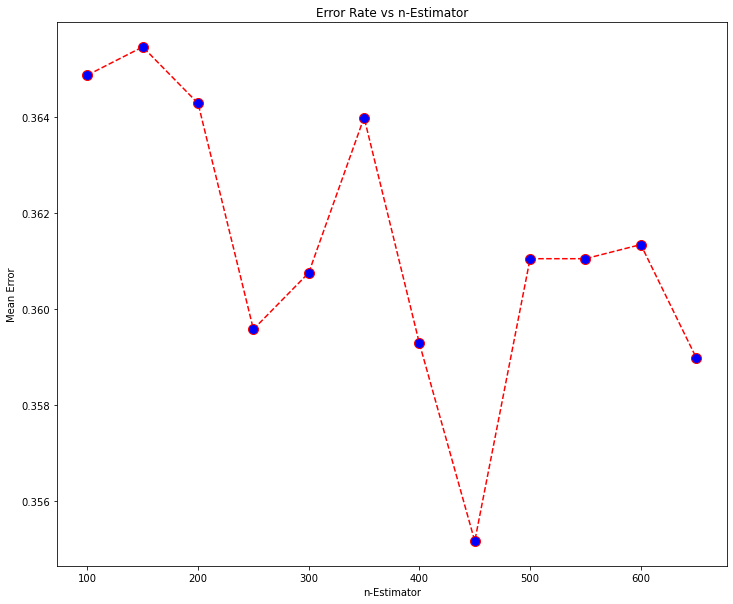

In [28]:
# Plot 7: 'Plotting n-Estimators and corresponding mean errors'
plot7 = util.plot_random_forest_mean_error(error)

In [29]:
# K-Nearest Neighbor Classifier
resultDict, error, cf_matrix = util.knn_classifier(X_train, X_test, y_train, y_test)

In [30]:
# Printing all 'N-Estimator' values along with their accuracies.
table = BeautifulTable()

table.column_headers = ["K-Neighbor", "Accuracy"]

for key,value in resultDict.items():
    #print(f"N-Estimator Value : {key} and Accuracy : {value}")
    table.append_row([key, value])
print(table)

+------------+----------+
| K-Neighbor | Accuracy |
+------------+----------+
|     4      |  0.574   |
+------------+----------+
|     6      |  0.578   |
+------------+----------+
|     8      |  0.566   |
+------------+----------+
|     10     |  0.575   |
+------------+----------+
|     12     |  0.579   |
+------------+----------+
|     14     |  0.585   |
+------------+----------+
|     16     |  0.583   |
+------------+----------+
|     18     |  0.588   |
+------------+----------+


In [31]:
cmtx = pd.DataFrame(
    cf_matrix, 
    index=['TRUE : READMITTED', 'TRUE : NOT READMITTED'], 
    columns=['PRED : READMITTED', 'PRED : NOT READMITTED']
)
print("KNN Confusion matrix")
print(cmtx)

KNN Confusion matrix
                       PRED : READMITTED  PRED : NOT READMITTED
TRUE : READMITTED                   1549                    439
TRUE : NOT READMITTED                963                    453


<Figure size 432x288 with 0 Axes>

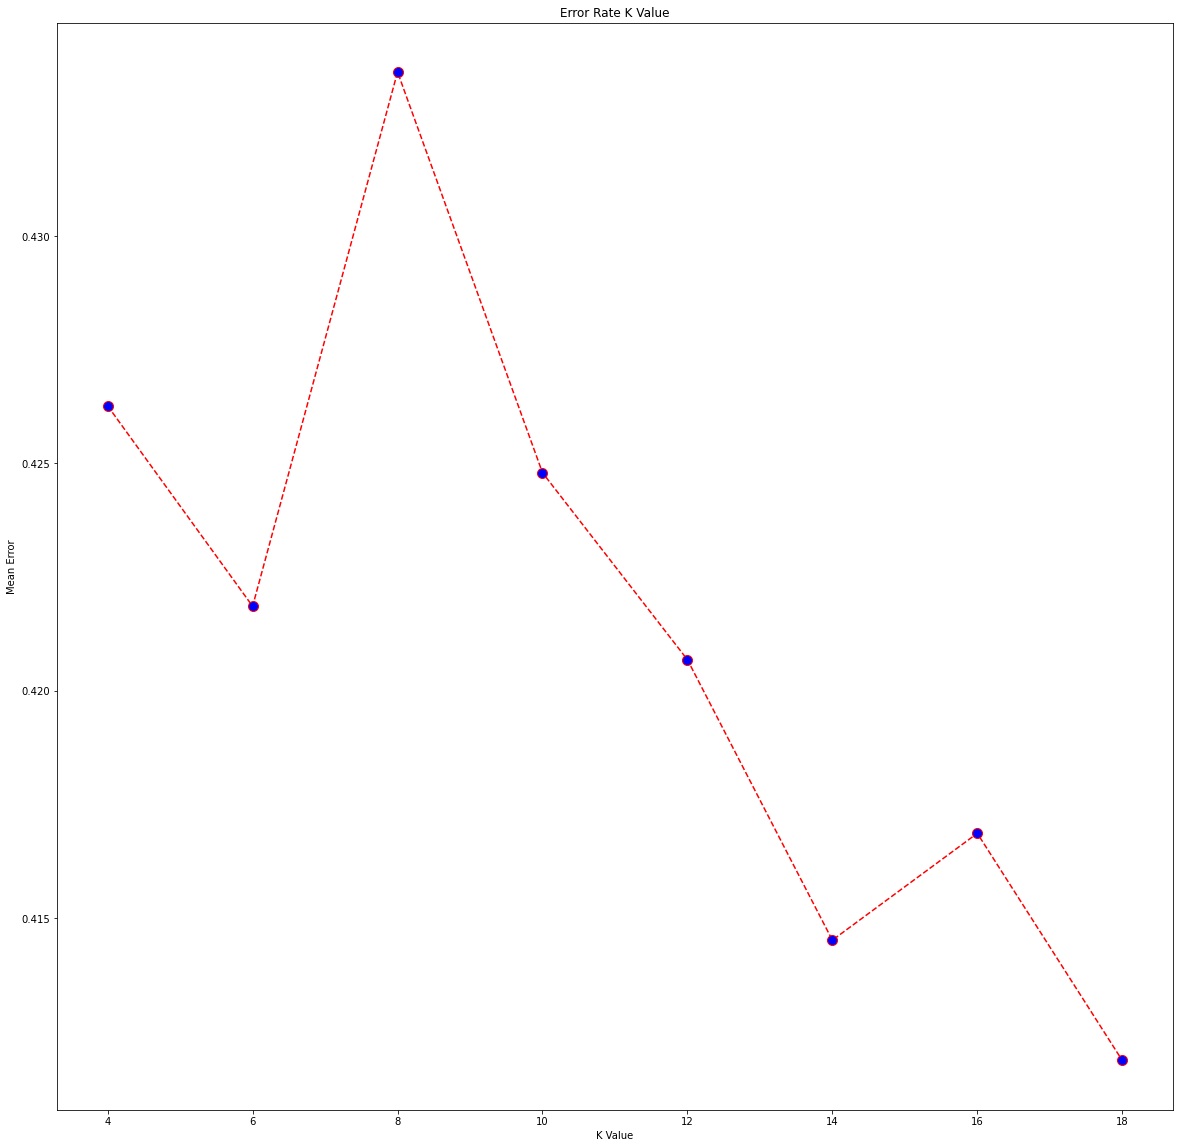

In [32]:
# Plot 8: 'Plotting K-Neighbors and corresponding Mean Errors'
plot7 = util.plot_knn_mean_error(error)

In [33]:
# Logistic Regression
accuracyLogisticReg, cf1_matrix = util.logistic_regression(X_train, X_test, y_train, y_test)
print(f"Accuracy of Logistic Regression : {round(accuracyLogisticReg*100,2)}%")

cmtx = pd.DataFrame(
    cf1_matrix, 
    index=['TRUE : READMITTED', 'TRUE : NOT READMITTED'], 
    columns=['PRED : READMITTED', 'PRED : NOT READMITTED']
)
print(cmtx)

Accuracy of Logistic Regression : 63.78%
                       PRED : READMITTED  PRED : NOT READMITTED
TRUE : READMITTED                   1615                    373
TRUE : NOT READMITTED                860                    556


In [34]:
# SVM Classifier
resultDict, accuracyDict, cf2_matrix = util.svm_classifier(X_train, X_test, y_train, y_test)

In [35]:
# Printing Classification Report for SVM Classifier
for key,value in resultDict.items():
    print(f"KERNAL: {key.upper()}")
    print(value)
    
cmtx = pd.DataFrame(
    cf2_matrix, 
    index=['TRUE : READMITTED', 'TRUE : NOT READMITTED'], 
    columns=['PRED : READMITTED', 'PRED : NOT READMITTED']
)
print(cmtx)

KERNAL: LINEAR
              precision    recall  f1-score   support

          NO       0.64      0.90      0.75      1988
         YES       0.67      0.27      0.39      1416

    accuracy                           0.64      3404
   macro avg       0.65      0.59      0.57      3404
weighted avg       0.65      0.64      0.60      3404

KERNAL: POLY
              precision    recall  f1-score   support

          NO       0.61      0.95      0.74      1988
         YES       0.69      0.16      0.26      1416

    accuracy                           0.62      3404
   macro avg       0.65      0.55      0.50      3404
weighted avg       0.64      0.62      0.54      3404

                       PRED : READMITTED  PRED : NOT READMITTED
TRUE : READMITTED                   1887                    101
TRUE : NOT READMITTED               1193                    223


In [36]:
# Printing all 'Kernels' of SVM Classifier along with their accuracies.

table = BeautifulTable()
table.column_headers = ["Kernel", "Accuracy"]
for key,value in accuracyDict.items():
    table.append_row([key.upper(), value*100])
print(table)

+--------+----------+
| Kernel | Accuracy |
+--------+----------+
| LINEAR |  64.248  |
+--------+----------+
|  POLY  |  61.986  |
+--------+----------+
